1658027741580.jpg


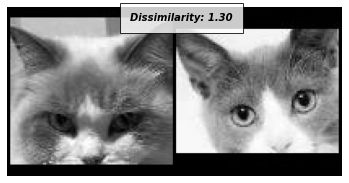

1657565257505.jpg


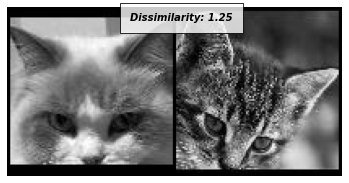

1656761677573.jpg


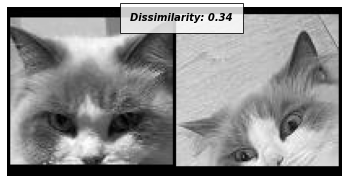

1657098864546.jpg


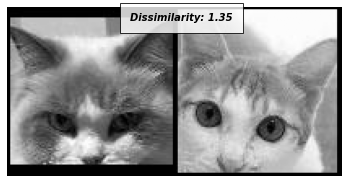

1656761440086.jpg


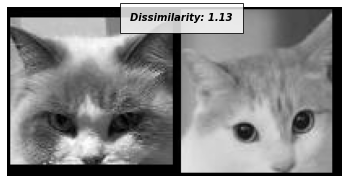

1656165055681.jpg


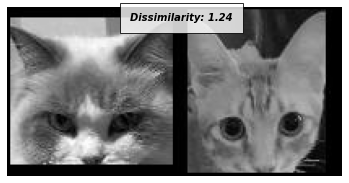

1656150994018 (1).jpg


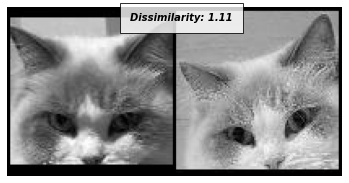

1656159127082 (1).jpg


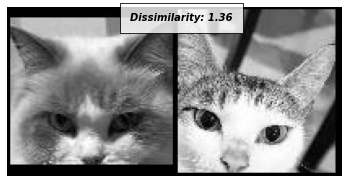

In [5]:


from config import Config
from contrastiveLoss import ContrastiveLoss
from siameset import SiameseNetwork
from SiameseNetworkDatasetWithSource import SiameseNetworkDatasetWithSource
from Util import *
import os

folder_dataset_test = dset.ImageFolder(root=Config.testing_dir+"/cat")
siamese_dataset = SiameseNetworkDatasetWithSource(
                                        imageFolderDataset=folder_dataset_test
                                        ,transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False
                                       ,sourceImgBase64="/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABkAGQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDz6H4Q6/O4RbzTASccyyf/ABFWv+FJ+JP+f7Sf+/sn/wAbrptO8cXELLLdW8ci7uTGNp/EV3ml+JdM1WMG3nCuesbnBFJNMqx47/wpPxJ/z/aT/wB/ZP8A43R/wpLxL/z+6T/39k/+N17wGDDIpxzxnpTCx4N/wpHxL/z/AGk/9/ZP/jdJ/wAKS8S/8/uk/wDf2T/43XvgDE4GeaMHjPegLHgn/CkfEv8Az/aT/wB/ZP8A43Wde/CrXLC48mW604tgHKyOR/6BX0WwZT0rmPEcTG/jYDOUA4/GhgkeJf8ACuNY/wCfmx/77f8A+JpP+Fc6x/z82P8A32//AMTXr9tpN5dZMcDEDrxUkmhXsakmEgDqTU3HZHjn/CutX/5+bH/vt/8A4mgfDjWWztnsjgZOHfgf9816Nqt7b6RDvuXG8/ciB+Zq425vbzWHP2hysIOUhU4Ue59T7mhysHKjIHgG8IB/trQef+n9f8KKmnt1WXANFTzsOU6vVtKi0nWJIxMqx3JMkSkMceoHH+c1lyxXNrIZoT5bDqD/AFH+NemapYfabRXUASRNuBPUeuPeuSvLSLOZJDI5wcA8Y9vT6GlLcYzSfHGowp5TSnI6q5yfwPcV2+i+NVuowkqxnkZOOteRX9oFfeqlSvKnjirekTypukySR95f60rsR9IabPb3kW5FXir7W0MnzbVzmvOPB97PCiqxOG612z6ikQLM/PXmp5hNGn9gtwpLRrgmoZrOxXDmCFsc5Kg1Ui1aO4jKg/Ws7V79orVkjPOD0ocxWI9a8S2FlZTJbyRrKvZa8p1vxnPLGxaR/LBwBu5dvQf1NZmvXVyL+SLcFVjksT0HeuYbzbmQSsp8sZWJT2H09TTXcotKJtUujc3DEsx4BOAB6DNXJrf7OmIzh1GTweR71Y05IpEVCHyOpTBx+B61cns5yjYTeoHDRjH/AI6eR+GRTGclIWLkkHnmirt1pkjzswTr14xRQVc9vYrBC287if4BXCX1iPNeMFyxckBDjHPA6HH4V3cMUTWxMmMegOKpwvai4Z1RlYHGVGf8/nQyDhB4buZW3LHsUnJJBz+VT2fh9LacOzA4549a7K7uEVWYY9dy8H8awrq5LZyR7k9azuxmlbXa2YCq4yBn6VDea2zuvzcDuK5uS8LO4yR25NVkLOWJbBHqaVhnaWGsNHIrByw749K1ZL+O5jOZPlI6V52l2YnwCVY9R0rQt71yQQTtDYJJo5RF7UdOtry48oRK/HAJwCenJrNj8K53EuF5wuB82O+B25q+tyxkzGrFiflxzVeKa5aRQ3Cj+Ed/QVSYED+F0iT9wqyTZ5LDhM+nqR7e/U1n3umXWmQefcYiUglWdtpbGOgz05HqRnkZrdbU5IQoyDJjP+6PbFc3rDXN+8krlnJ6FucdcYHbr07fpVIRRfVGBB8ndkZyN4/kaKyJRcBsDdwMcUUxnuEpMUKQxxq8j9qaNJjiTzCohmbkhT1+o71txWqxymeT7oHygisTWdUyNinkA9s1EmBnXzrChJAxjpjFc1Jeh5GQqV5+XNGo65aglJ5wvYDqP5Vjfao2kMkE24Z4AOQf1xihICwoD3Mi45PIFaOm2LXl5DHkASdO+PeqNlcxsZXYpuAwpzg5967rwxYW62cN1I67y42t/s56CmkJs5DVLRrJrhGV96N97GQtV2lkh0hJEUnd+GPrXpXifw9BqEEjxOEmeMlj1ye1eeS6fPb+XBIU+RhlmyVH6fpTsJMnglkj0xHcqvyksxOAeOnc9jxSW2oR3ETbCrcEbgxAx+NZF/L5yhGdFjTk7lAUjHU84656VXjurSMM4voGA6LE24A/XJx+tKwzovs/IEhBDHcSB+X4fX/69a50dBZqXjwzjp6VzNp4hgedCrMFB7hSAfwxXVLqqXCcuAp/iAwMe+M/zpDOZvPDMnn5jJKkZG0cUVuu8TtuSIMp6Eu2aKq4Hda1dLa2bEggY4x615hqdzPfh18wJGT1z0FeheI1d7WQBchecV5zctJBay7IgA3BJ6UrCRzF3p0cyylH3uFIA3VzuqQySWsEsS/NHjcAeQf8a6WRpUO0ocDruwf0q3aaONVfYmY5ZAFEgbg/Xr+oNXF2E0clZTzQbDcSFgT1PUDtzXo1jqdw9pBtdtqj5dvasTVfhb4hgi88RPMhwF8sA9fp3r1Twv4HFpodsLmP/S9vzID0NElfYLnN3HiSd7SOIsxYDBJrjvEOqGKzY7yzudqgnrmvQ/EnhS4hjlnWIRmM8hSCv4dP615P4hsZr2SFEB2qSW9qlKz1GrM5+8aeTy7mOQlx2z09sUyKMuVjSIhpCCMD/OK7Tw78NdS12QNFJJHb/wB9/lU/41ra/wCC7bw4qqWeQbeJEYZHoMEDJ/Hj1rS+gupzVhaRpCA0qh8cdeT9ela0Fy1qRsll9wTnFU41jhUeVJMSw3Bm6H8akw7nc4DEddrAj+VZsZrpqLFQRM34ZFFZq/d43gfU/wCFFSM9t1aAS7x82cHgf41x15YRrC4bh8kABeg64HrXWz+KfCUiNu8S6OSewvov/iq4rVdf0IOwj1rTXXpmK7TJHpkHiqaZKOdm0+RJjlF25zjocfgOfw7dq6jwbYxrdvKS74YH5Fbb+eByPfFc3N4h0wxTCPULVo0wSPtKKOTgYXOWI9q6DSte0y1t3htfEOjpEqqAWvEUE9CVDYI+mKEDPVLK9ZZGhTGSOFJyR71cs59szKwUhVzu7+9cXpPiXwtYwrE3iDRy7D5nbVIsk/gcVgeLfHVpp0CS6Rr+mXSO372NLyN3X6AdRVLQlK7sd94ivo1s3d0Lxj73OOPwrlLDRNJ1CBZri2zI5yQoB3e+OteWah8Qr69kWEX8DRtkMpkUL9efX8K9A0HW/DemaRAqazo91eOCZ5LjUI49pP8ACoLfdFG5TjynXnULS1iWC28hY1GCOflwOnFc3qd1bX0rPPM64PyFf4ffOeTzVC61TRhvnh8RaCHHPki/TB/ENXNXmu6bukdtT047STiK5Rh17c5NS7iSC9sENy8jSSFGOSxIOf0FZtxbqHAjAx6jP9arS+I7aVsfbrbZ2BkH+NIutWHe/th/22X/ABqbsstCNQMFVP4UVAdW048/b7T/AL/L/jRRqM8tooorpMgooooAKKKKACiiigAooooAKKKKACiiigD/2Q==")
                                       

test_dataloader = DataLoader(siamese_dataset,num_workers=0,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)


PATH = "./catnet.pt"
net = SiameseNetwork()
net.load_state_dict(torch.load(PATH))



for i in range(0,siamese_dataset.__len__()):
    
    x0,x1,label2,filename = next(dataiter)
    print(os.path.basename(filename[0]))
    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0),Variable(x1))
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}'.format(euclidean_distance.item()))